In [6]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [14]:
X_train_full.shape

(60000, 28, 28)

In [15]:
X_train_full.dtype

dtype('uint8')

In [16]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [17]:
# what each label converts to as an object, assuming the book got this from mnist documentation
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Sneaker", "Bag", "Ankle boot"]

In [18]:
class_names[y_train[0]]

'Coat'

In [19]:
# Create the input shape for the nn by calling shape then using only the 2 and 3 values
data_shape= X_train.shape[1:]

In [20]:
#Building the NN
layer =keras.layers

model = keras.models.Sequential([
    layer.InputLayer(input_shape=data_shape),
    layer.Flatten(),
    layer.Dense(300, activation="relu"),
    layer.Dense(100, activation="relu"),
    layer.Dense(10, activation="softmax"),
], name="poop")

/Users/hahn/Datasci/.venv/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [21]:
model.summary()

Model: "poop"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [23]:
# Now we call compile to compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.01), metrics=["accuracy"])

In [163]:
# Now we fit the model and assign its training to history and use that varible to view what is going on
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6876 - loss: 0.9890 - val_accuracy: 0.8196 - val_loss: 0.5285
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8247 - loss: 0.5054 - val_accuracy: 0.8432 - val_loss: 0.4451
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8413 - loss: 0.4537 - val_accuracy: 0.8588 - val_loss: 0.4181
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8541 - loss: 0.4177 - val_accuracy: 0.8658 - val_loss: 0.3877
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8619 - loss: 0.3971 - val_accuracy: 0.8608 - val_loss: 0.3948
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8680 - loss: 0.3789 - val_accuracy: 0.8674 - val_loss: 0.3746
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8708 - loss: 0.3634 - val_accuracy: 0.8732 - val_loss: 0.3624
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8746 - loss: 0.3505 - 

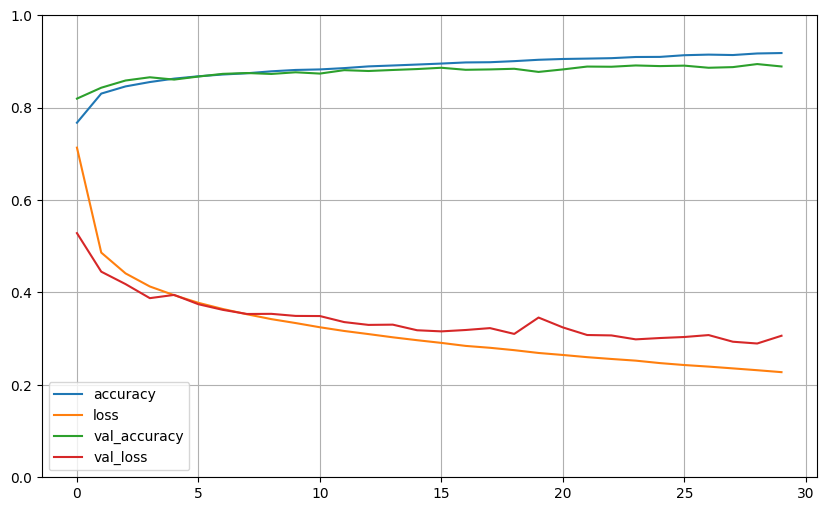

In [170]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [173]:
# Now we can eval the model on the test set
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8384 - loss: 66.5427   


[69.70893096923828, 0.8348000049591064]

In [174]:
# Make predictions on new data
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
# Get the classes for these predictions 
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

# REGRESSION TIME

In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
housing = fetch_california_housing()

In [28]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

X_train, X_valid, y_train, y_valid  = train_test_split(X_train_full, y_train_full)

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [31]:
# Now we build the model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")

# NEW FEATURE - Early stopping using callbacks
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=early_stopping)

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20


/Users/hahn/Datasci/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3161 - val_loss: 0.6120
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6076 - val_loss: 0.5056
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5123 - val_loss: 0.4683
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4516 - val_loss: 0.4541
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4670 - val_loss: 0.4453
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4637 - val_loss: 0.4354
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4366 - val_loss: 0.4291
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4226 - val_loss: 0.4276
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4185 - val_loss: 0.4211
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4220 - val_loss: 0.4140
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4111 - val_loss: 0.4105
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.

## NOTES ON HYPERPARAMS

In [32]:
# First using cross validation with either grid or random search
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
    param_distribs = {
        "n_hidden": [0, 1, 2, 3],
        "n_neurons": np.arange(1, 100),
        "learning_rate": reciprocal(3e-4, 3e-2),
}
    rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
    rnd_search_cv.fit(X_train, y_train, epochs=100,
                      validation_data=(X_valid, y_valid),
                      callbacks=[keras.callbacks.EarlyStopping(patience=10)])
# This wont run as I havent installed scipy in this venv.... ill do that 


IndentationError: unexpected indent (740114965.py, line 4)

For many problems you can start with one or two hidden layers and the neural nertwork will
work just fine. You cant ramp up the hidden layers until you start iver fitting the training
set.

#### Layers
For many problems you can start with one or two hidden layers and the neural nertwork will
work just fine. You cant ramp up the hidden layers until you start iver fitting the training

#### Neurons
Use to be common to size and shape them like a pyramid, though there is no evidence that it was any 
better and often if was never better.

You can just use the same number of neurons for every hidden layer if you wish, just as good as 
pyramidding

Just like layers you can increase the number of neurons gradually until overfitting starts. 

In practice it is best to pick a model with more layers and neurons than it needs and then use early 
stopping and other regularization techniques to prevent it from over fitting.

#### Learning rate
Arguably the most important hyperparameter

In gerneral the optimal rate is hal=f of the max learning rate (the rate at which above, training starts
to diverge, book book refs chapter 4 here, so go look if you are confused)

